In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [114]:
df=pd.read_csv('titanic_toy.csv')

In [115]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [117]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [118]:
x=df.drop(columns=['Survived'])

In [119]:
x

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [120]:
y=df['Survived']

In [121]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [123]:
x_train.shape,y_train.shape

((712, 3), (712,))

In [124]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [125]:
x_test.isnull().mean()

Age       0.162011
Fare      0.050279
Family    0.000000
dtype: float64

In [126]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

In [127]:
mean_age,median_age

(np.float64(29.78590425531915), 28.75)

In [128]:
mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [129]:
mean_fare,median_fare

(np.float64(32.61759689349112), 14.4583)

In [130]:
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)

In [131]:
x_train.shape

(712, 5)

In [132]:
x_train['fare_mean']=x_train['Fare'].fillna(mean_fare)
x_train['fare_median']=x_train['Fare'].fillna(median_fare)

In [133]:
x_train.head()

,Age,Fare,Family,Age_median,Age_mean,fare_mean,fare_median
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458


In [134]:
print('orginal age variable variance :',x_train['Age'].var())
print('age variance after median imputation :',x_train['Age_median'].var())
print('age variance after mean imputation  :',x_train['Age_mean'].var())

orginal age variable variance : 204.3495133904614
age variance after median imputation : 161.9895663346054
age variance after mean imputation  : 161.81262452718673


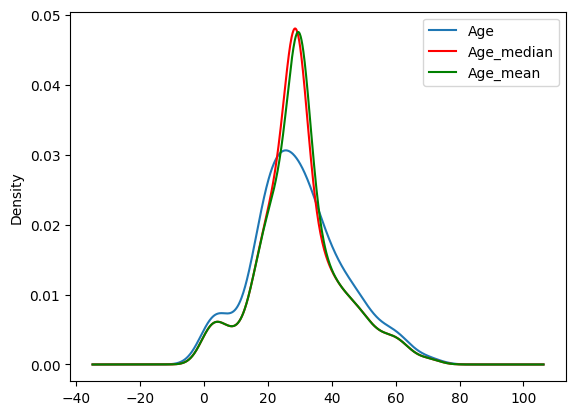

In [135]:
fig =plt.figure()
ax=fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax)
x_train['Age_median'].plot(kind='kde',ax=ax,color='red')
x_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [136]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,fare_mean,fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205499,0.205942
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.089673,0.086982
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.086078,0.083461
fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,1.000000,0.996607
fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,0.996607,1.000000


<Axes: >

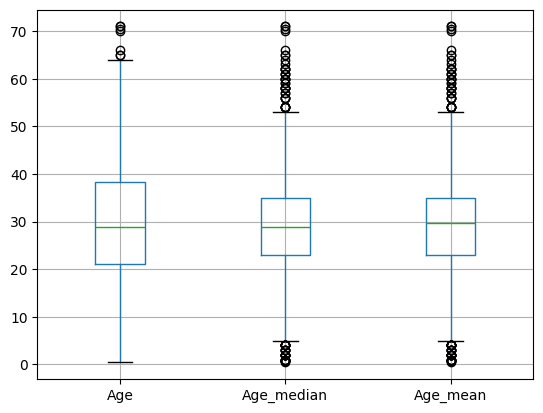

In [137]:
x_train[['Age','Age_median','Age_mean']].boxplot()

# using sklearn

In [138]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [139]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [140]:
trf.fit(x_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [141]:
ColumnTransformer(remainder='passthrough',
                 transformers=[('imputer1',SimpleImputer(strategy='median'),['Age']),
                               ('imputer2',SimpleImputer(),['Fare'])])

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [142]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [143]:
trf.named_transformers_['imputer2'].statistics_

# x_train=trf.transform(x_train)
# x_test=trf.transform(x_test)

array([32.61759689])

In [144]:
trf.fit(x_train)

# x_train = trf.fit_transform(x_train)
# x_test  = trf.transform(x_test)


,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [145]:
type(x_train)


pandas.core.frame.DataFrame

In [149]:
x_train = trf.transform(x_train)
# x_test  = trf.fit_transform(x_test)


ValueError: Specifying the columns using strings is only supported for dataframes.